## Descriptive statistics and Exploratory Data Analysis (EDA) 


Descriptive statistics and Exploratory Data Analysis (EDA) are fundamental steps in the data analysis process, providing initial insights into the structure, characteristics, and relationships within a dataset. When applied to the dataset in question, which includes various socio-economic, demographic, and employment-related variables, these methodologies offer critical insights that can guide deeper analyses and inform decision-making processes. 

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


StatementMeta(, bcec404c-81ef-4894-a4d0-f5a8271ed048, 3, Finished, Available)

In [4]:
# Load data into pandas DataFrame from "/lakehouse/default/" + "Files/adult.csv"
df = pd.read_csv("/lakehouse/default/" + "Files/adult.csv")
display(df)

StatementMeta(, bcec404c-81ef-4894-a4d0-f5a8271ed048, 6, Finished, Available)

SynapseWidget(Synapse.DataFrame, 580d7b96-90c7-49a4-9342-8b98c025bd27)

In [3]:
# Descriptive Statistics for Numerical Variables
numerical_descriptive_stats = df.describe()

StatementMeta(, bcec404c-81ef-4894-a4d0-f5a8271ed048, 5, Finished, Available)

In [13]:
# Mode for Numerical Variables (Pandas describe does not include mode)
numerical_mode = df.mode().iloc[0]


StatementMeta(, bcec404c-81ef-4894-a4d0-f5a8271ed048, 15, Finished, Available)

In [16]:
# Range (Max - Min) for Numerical Variables
numerical_range = df.max(numeric_only=True) - df.min(numeric_only=True)

StatementMeta(, bcec404c-81ef-4894-a4d0-f5a8271ed048, 18, Finished, Available)

In [19]:
# Creating a DataFrame to include Mode and Range
additional_stats = pd.DataFrame([numerical_mode, numerical_range], index=['mode', 'range'])

StatementMeta(, bcec404c-81ef-4894-a4d0-f5a8271ed048, 21, Finished, Available)

In [20]:
# Combine Descriptive Stats with Additional Stats
combined_stats = pd.concat([numerical_descriptive_stats, additional_stats])

StatementMeta(, bcec404c-81ef-4894-a4d0-f5a8271ed048, 22, Finished, Available)

In [18]:
# Frequency Counts for Categorical Variables
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_counts = df[categorical_columns].apply(pd.Series.value_counts)

StatementMeta(, bcec404c-81ef-4894-a4d0-f5a8271ed048, 20, Finished, Available)

In [21]:
# Display Combined Numerical Stats
print("Combined Numerical Stats:")
print(combined_stats)

StatementMeta(, bcec404c-81ef-4894-a4d0-f5a8271ed048, 23, Finished, Available)

Combined Numerical Stats:
                age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   
mode      36.000000  1.230110e+05       9.000000      0.000000      0.000000   
range     73.000000  1.472420e+06      15.000000  99999.000000   4356.000000   

       hours.per.week workclass education      marital.status      occupation  \
count    325

StatementMeta(, bcec404c-81ef-4894-a4d0-f5a8271ed048, 25, Finished, Available)

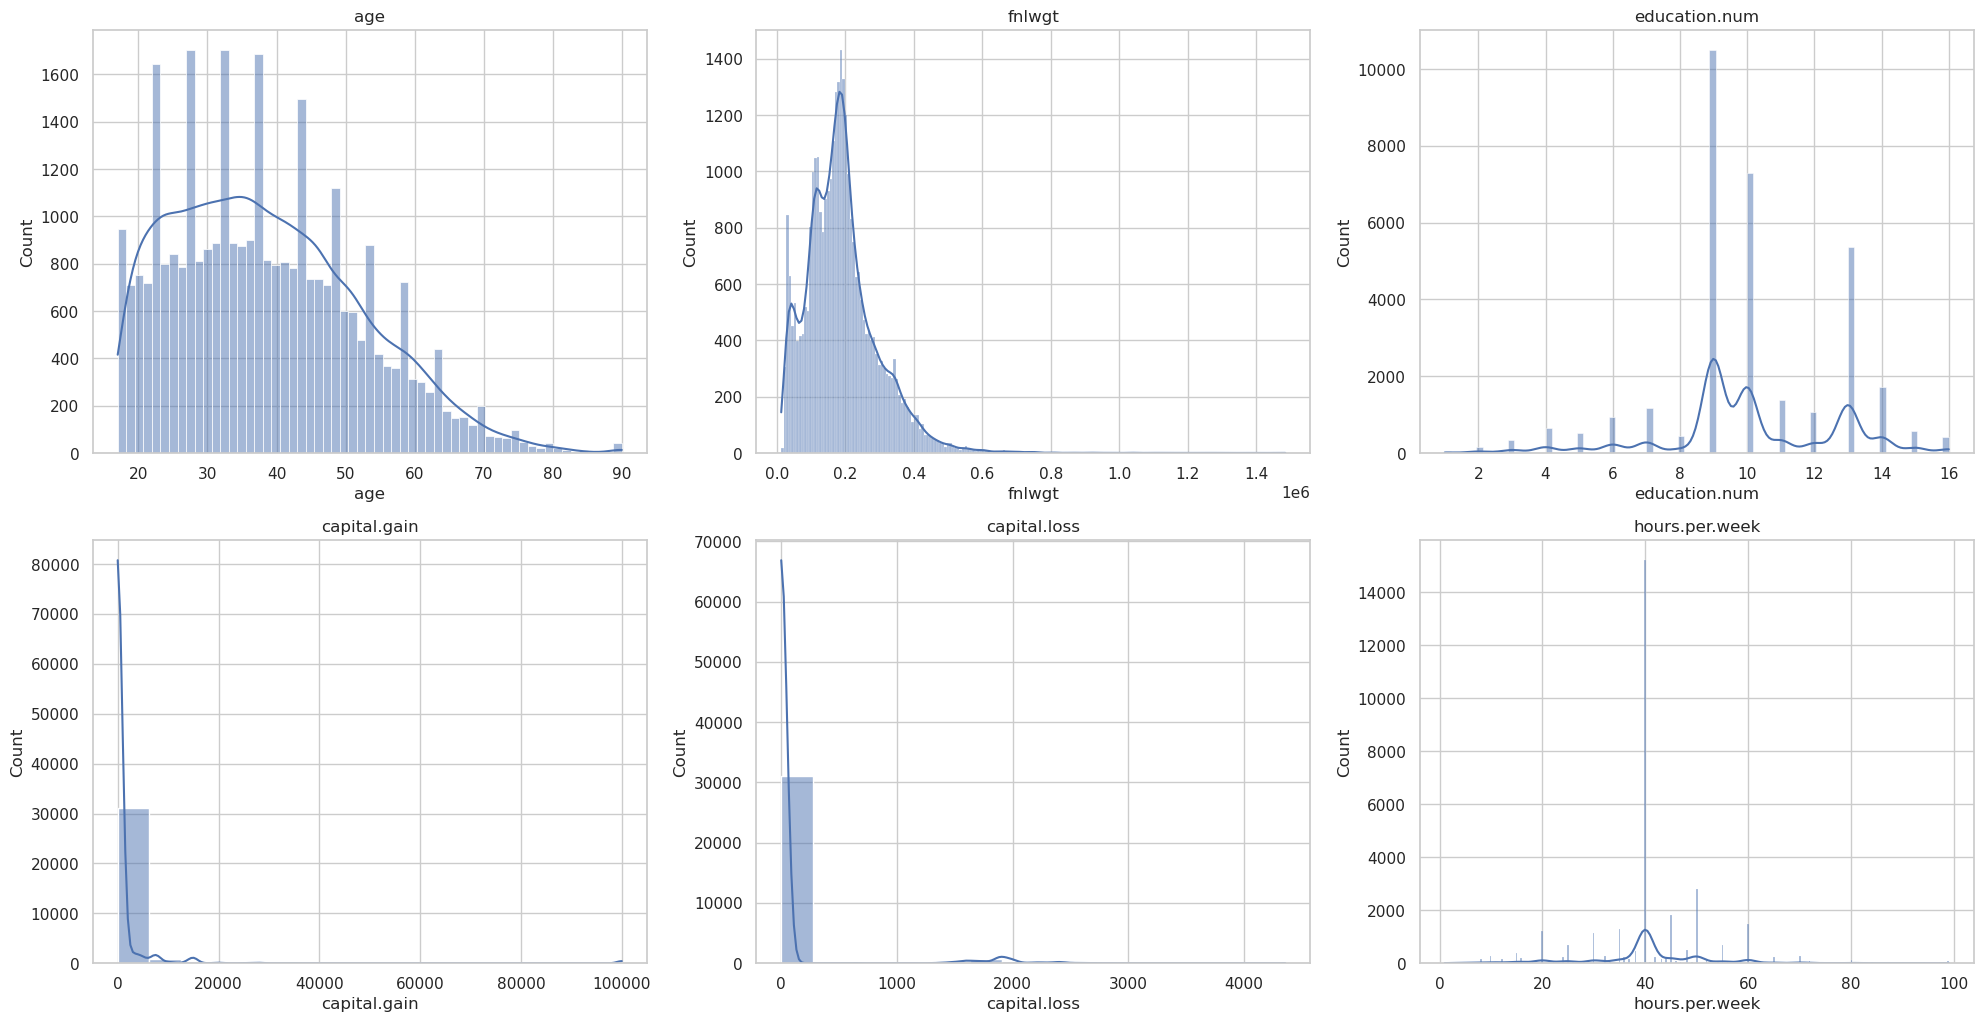

In [23]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Histograms for numerical variables
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

The histograms presented above provide us with insights into how the numerical variables in the dataset are distributed. 

**Age**: The graph skews towards the right, indicating that there are more young people than old people in the dataset.

**Fnlwgt (Final Weight)**: This variable, which is perhaps related to population weights, also exhibits a right-skewed distribution, with most values being low.

**Education.num (Educational Number of Years)**: The graph displays bumps at common education levels such as high school and bachelor's degrees.

**Capital Gain and Capital Loss**: Both variables exhibit a heavily right-skewed distribution, with most values at 0. This indicates that the majority of people in the dataset do not make or lose money from investments regularly.

**Hours per Week:** The graph shows a significant bump around 40 hours, which is considered the standard full-time work week. Fewer people work fewer or more hours than that.

StatementMeta(, bcec404c-81ef-4894-a4d0-f5a8271ed048, 10, Finished, Available)

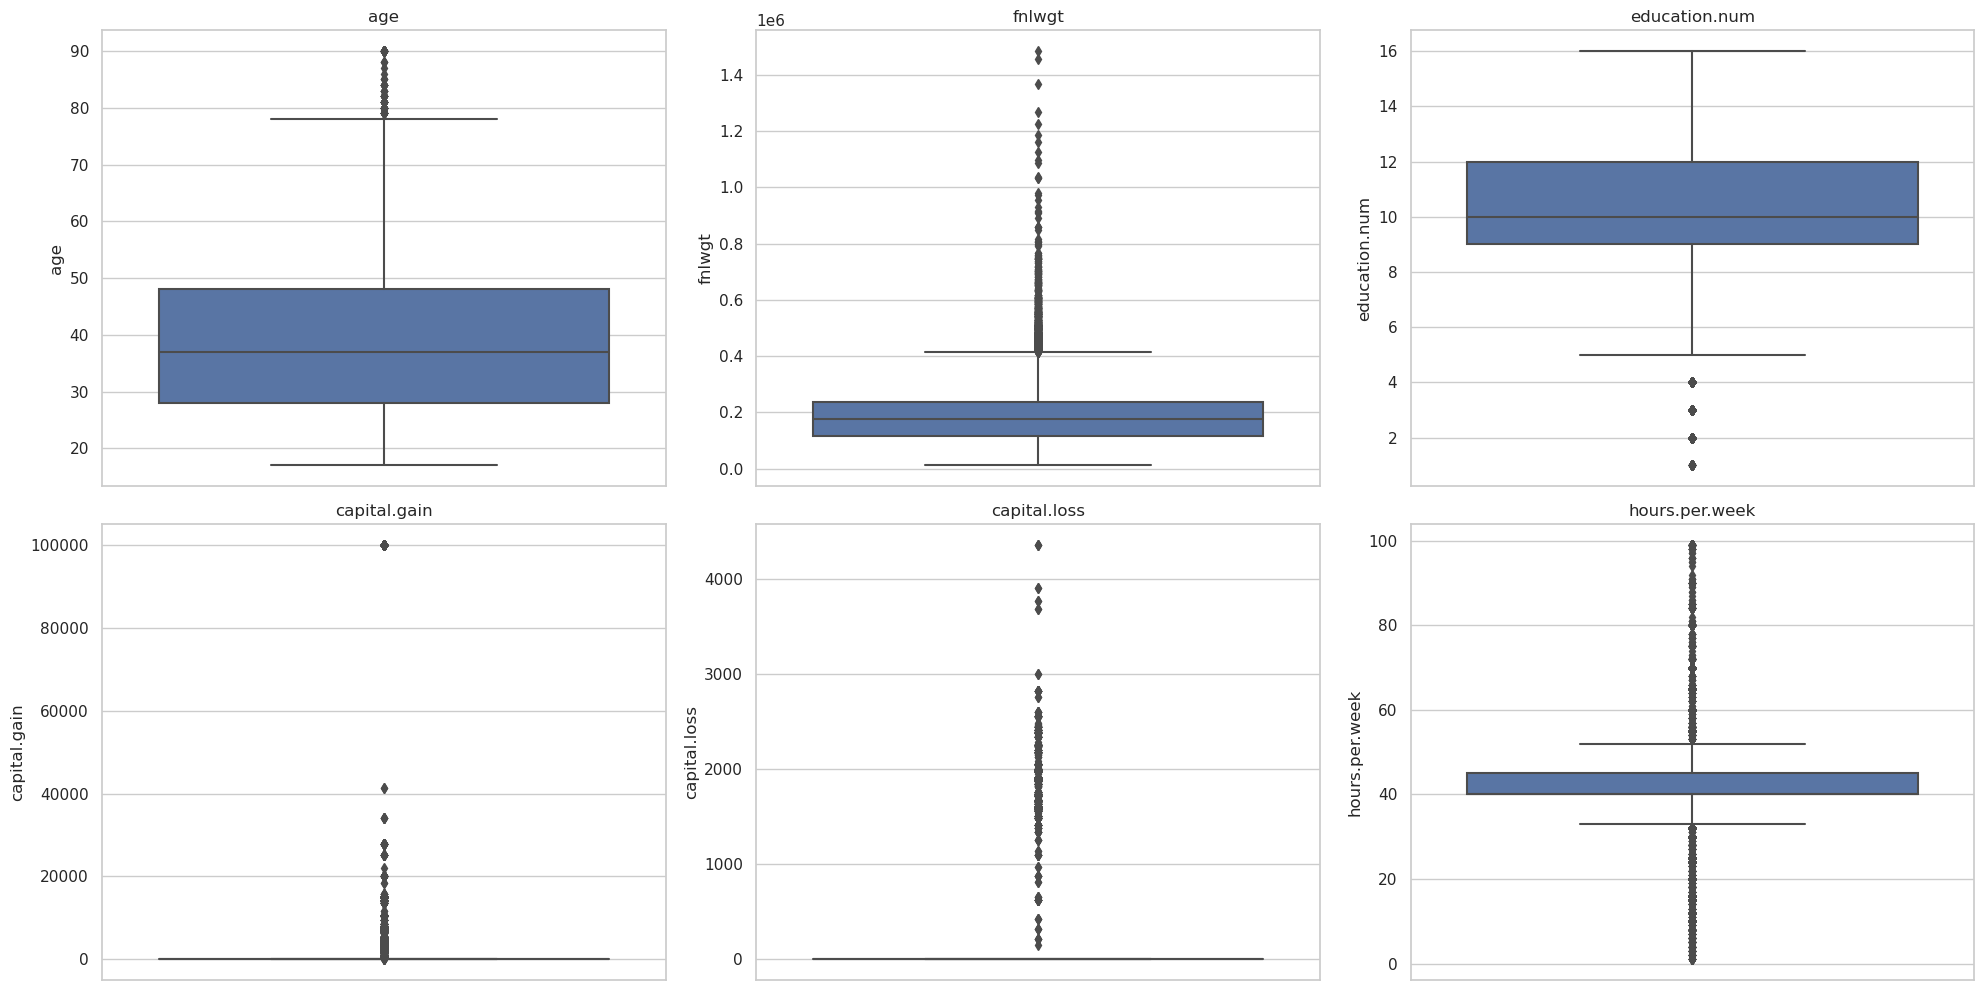

In [8]:
# Box plots for numerical variables
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()


StatementMeta(, bcec404c-81ef-4894-a4d0-f5a8271ed048, 12, Finished, Available)

/tmp/ipykernel_5684/3553637273.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_5684/3553637273.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_5684/3553637273.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_5684/3553637273.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_5684/3553637273.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_5684/3553637273.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


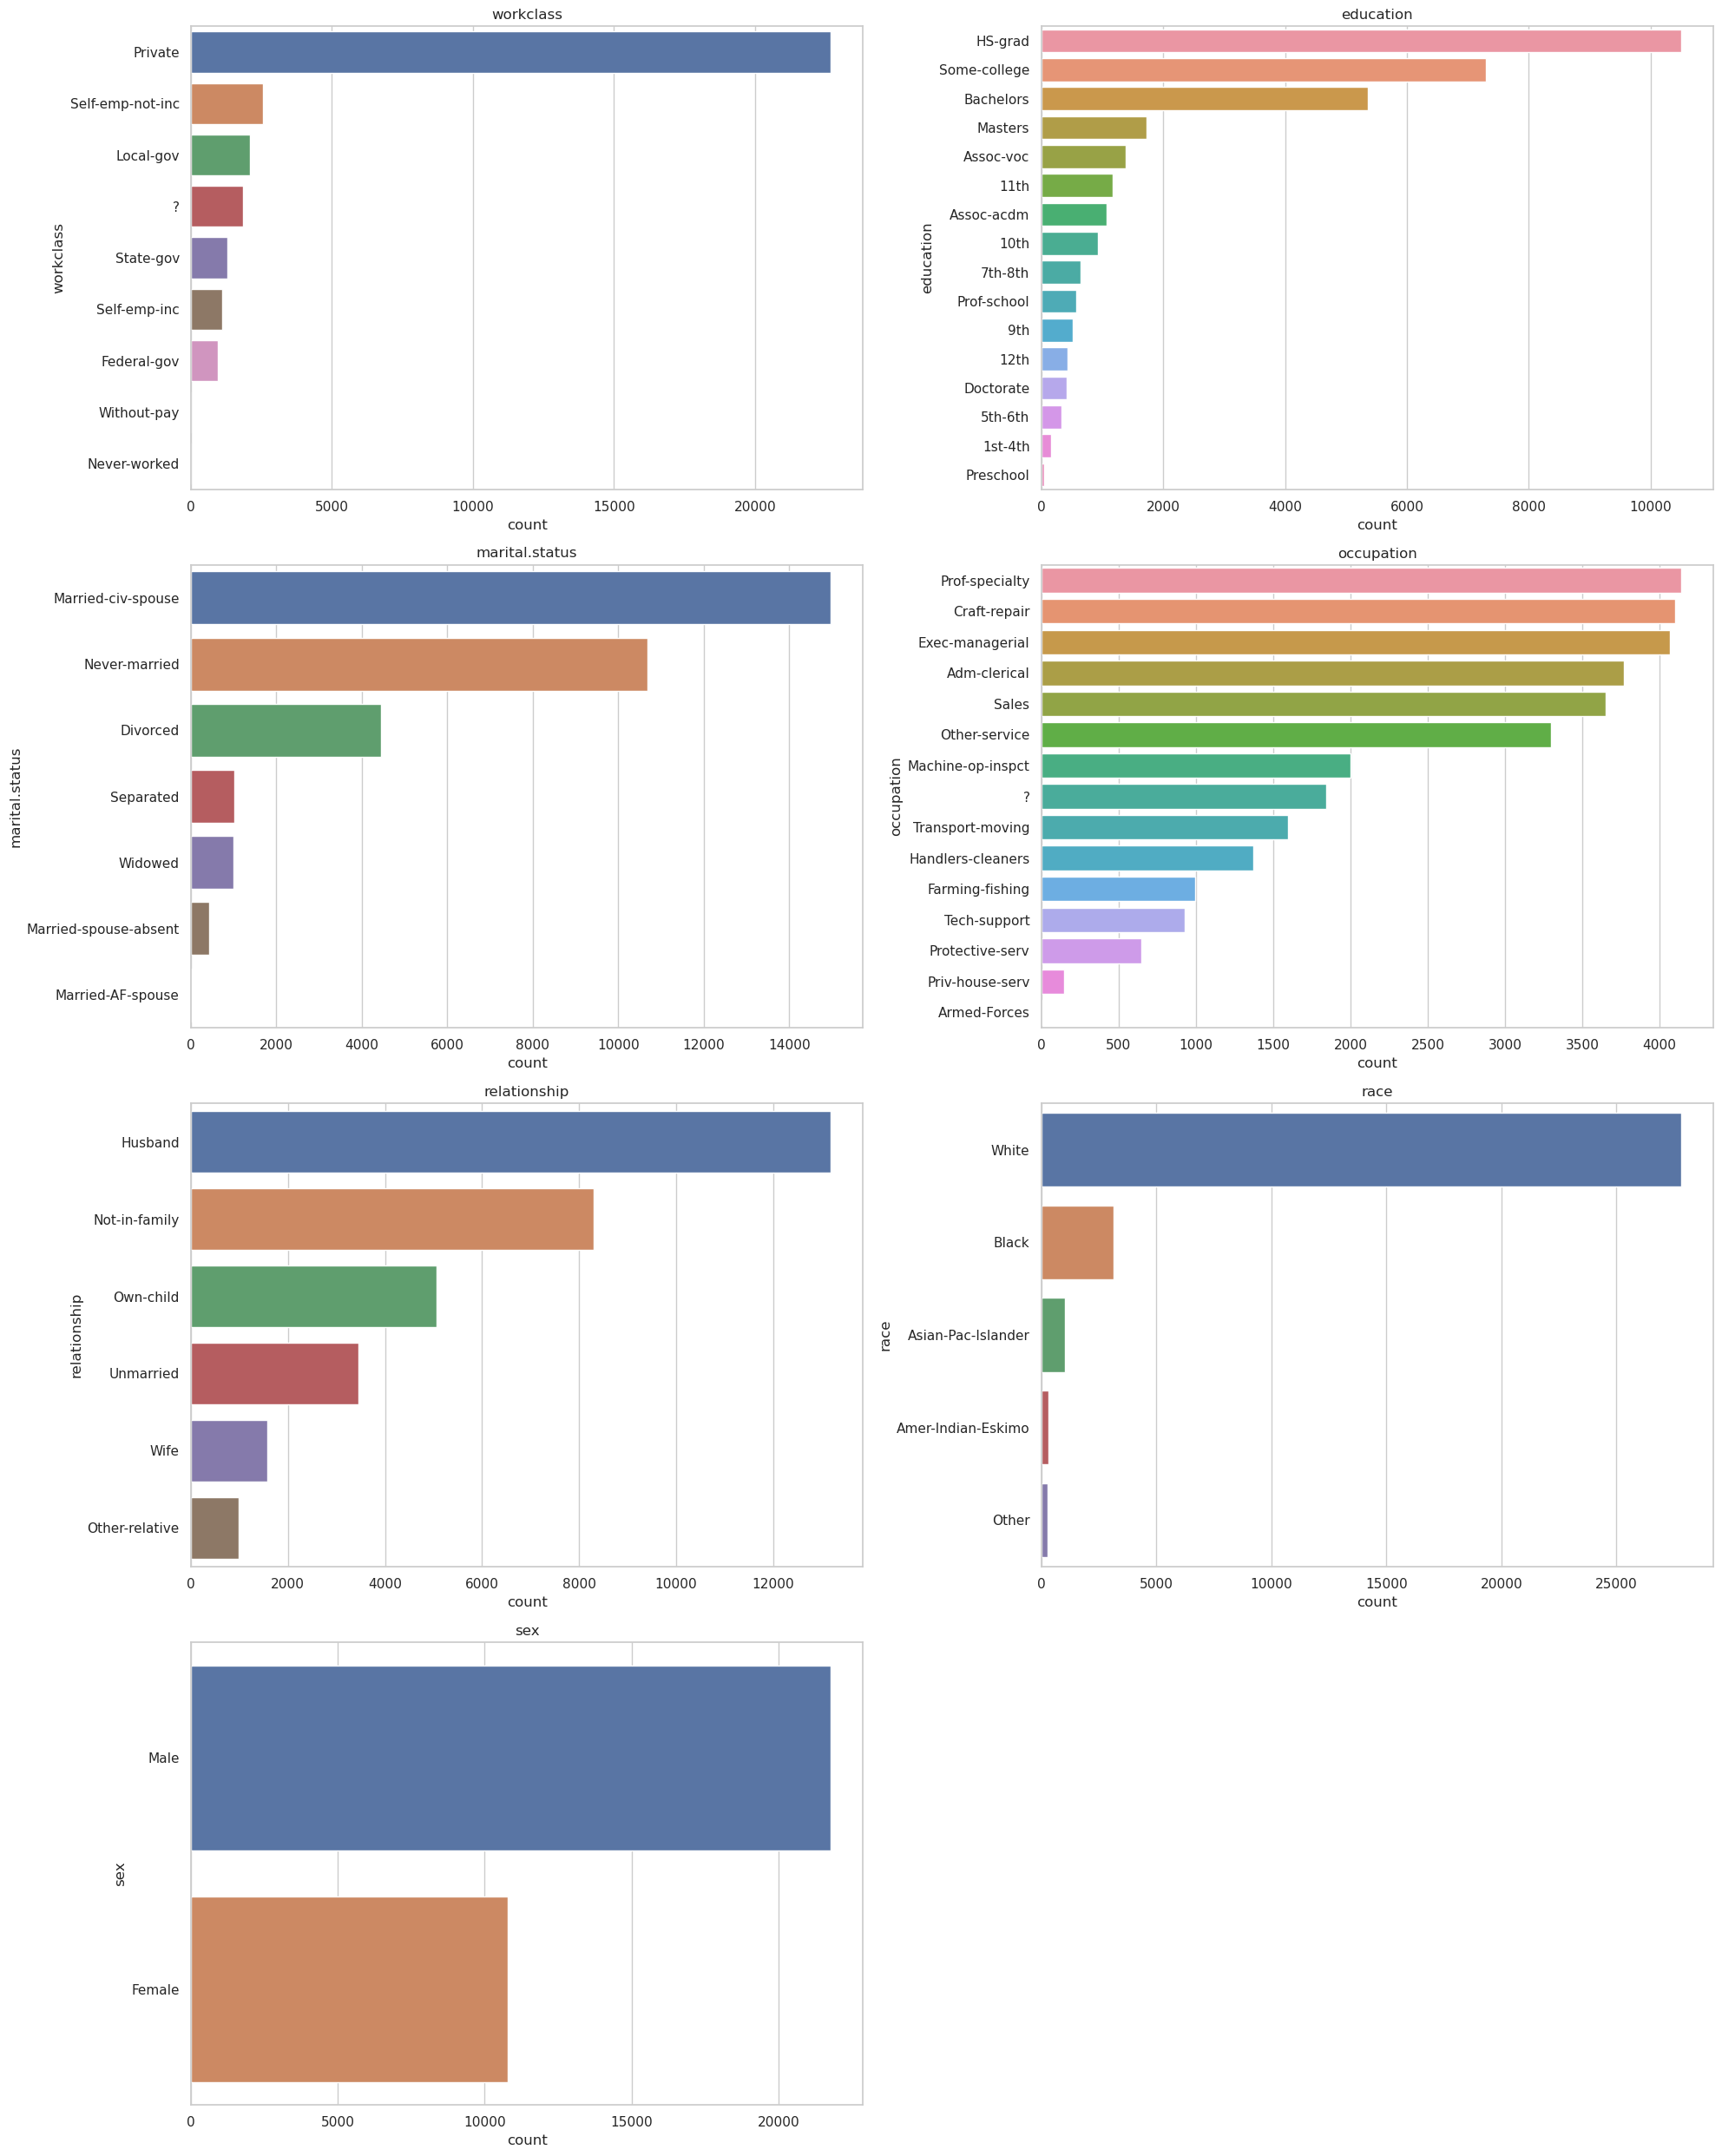

In [10]:
# Selection of a few categorical variables for bar charts
selected_categorical_columns = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
plt.figure(figsize=(20, 25))

for i, column in enumerate(selected_categorical_columns, 1):
    plt.subplot(4, 2, i)
    sns.countplot(y=df[column], order = df[column].value_counts().index)
    plt.title(column)
    plt.tight_layout()

plt.show()

Here's a summary of the insights that can be extracted from box plots and bar charts for specific numerical and categorical variables.

**Box Plots (Numerical Variables)**

**Outliers**: The box plots reveal outliers in several variables, particularly in capital.gain, capital.loss, and to a lesser extent in hours.per.week and age. These outliers could represent unique cases or data entry errors, and hence require further investigation.

**Distribution Characteristics**: The interquartile range (IQR) in variables like age and hours.per.week indicates variability among the central values, while the capital.gain and capital.loss variables show that high values are rare.

**Bar Charts (Categorical Variables)**

**Workclass**: The majority of individuals belong to the Private sector, followed by Self-emp-not-inc, Local-gov, and ? (missing values).

**Education**: The dataset features a wide range of educational backgrounds, with HS-grad being the most common, followed by some college and Bachelors.

**Marital Status:** Married-civ-spouse is the most frequent status, indicating that a significant portion of the dataset is married.

**Occupation**: Prof-specialty and Craft-repair are common occupations, with a variety of other occupations represented.

**Relationship**: Husband is the most common relationship status, followed by Not-in-family and Own-child.

**Race**: The dataset predominantly consists of individuals who identify as White, with Black being the second most common race.

**Sex**: There are more male individuals than female individuals in the dataset.

## Conclusion
The dataset contains demographic and socioeconomic diversity, with a predominance of younger and middle-aged individuals. Educational attainment is varied, with a significant number of individuals having completed some college education or attained a Bachelor's degree. Employment in the private sector, professional specialties, and craft-related occupations is common, and variables such as education, occupation, and hours per week can indicate income potential. The dataset contains outliers, and careful data cleaning and preprocessing are necessary. Marital status and relationship categories show a significant number of married individuals, and gender and race distribution should be considered to avoid bias. The dataset provides opportunities for predictive modeling, particularly for income prediction based on demographic, educational, and occupational variables.